# CONSTRUCTION OF FX VOL SURFACE - PART II

In this notebook I show how you can calibrate to the FX Vol Surface to ATM, 25D and 10D at one expiry date and analyse different volatility interpolation methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.models.black_scholes import *
from financepy.products.fx import *
from financepy.market.curves import DiscountCurveFlat
from financepy.market.volatility import *

####################################################################
#    FINANCEPY Version 1.1 - This build: 27 Aug 2025 at 13:51      #
#     This software is distributed FREE AND WITHOUT ANY WARRANTY   #
#  Report bugs as issues at https://github.com/domokane/FinancePy  #
####################################################################



## Load the Volatility Market Quotes

In [3]:
value_dt = Date(10, 4, 2020)

In [4]:
for_name = "EUR"
dom_name = "USD"
for_cc_rate = 0.03460  # EUR
dom_cc_rate = 0.02940  # USD

We need to set up the option details - what you would find in the Term Sheet.

In [5]:
domestic_curve = DiscountCurveFlat(value_dt, dom_cc_rate)
foreign_curve = DiscountCurveFlat(value_dt, for_cc_rate)

In [ ]:
currency_pair = for_name + dom_name
spot_fx_rate = 1.3465

I now load the option tenor, the ATM vol and the market strangle and risk-reversal quotes.

In [7]:
tenors = ['1Y']
atm_vols = [18.250]
ms25DeltaVols = [0.95]
rr25DeltaVols = [-0.60]
ms10DeltaVols = [3.806]
rr10DeltaVols = [-1.359]

We need to set some parameters for the vol surface.

In [8]:
notional_currency = for_name
atm_method = FinFXATMMethod.FWD_DELTA_NEUTRAL
delta_method = FinFXDeltaMethod.SPOT_DELTA
alpha = 0.50

In [ ]:
fxVolSurfaceClark = FXVolSurfacePlus(value_dt, spot_fx_rate, currency_pair, notional_currency,
                                       domestic_curve, foreign_curve,
                                       tenors, atm_vols,
                                        ms25DeltaVols, rr25DeltaVols,
                                        ms10DeltaVols, rr10DeltaVols,
                                        alpha,
                                        atm_method, delta_method,
                                        VolFuncTypes.CLARK)

In [ ]:
fxVolSurfaceSABR = FXVolSurfacePlus(value_dt, spot_fx_rate, currency_pair, notional_currency,
                                       domestic_curve, foreign_curve,
                                       tenors, atm_vols,
                                       ms25DeltaVols, rr25DeltaVols,
                                       ms10DeltaVols, rr10DeltaVols,
                                       alpha,
                                       atm_method, delta_method,
                                       VolFuncTypes.SABR)

In [ ]:
fxVolSurfaceBBG = FXVolSurfacePlus(value_dt, spot_fx_rate, currency_pair, notional_currency,
                                       domestic_curve, foreign_curve,
                                       tenors, atm_vols,
                                       ms25DeltaVols, rr25DeltaVols,
                                       ms10DeltaVols, rr25DeltaVols,
                                       alpha,
                                       atm_method, delta_method,
                                       VolFuncTypes.BBG)

We can examine the calibration

In [12]:
fxVolSurfaceClark.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ALPHA WEIGHT: 0.5
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000%
IN MKT STR 25d VOL:  0.950000%
IN RSK REV 25d VOL: -0.600000%
IN MKT STR 10d VOL:  3.806000%
IN RSK REV 10d VOL: -1.359000%
T_(YEARS):  1.0
CNT_CPD_RD:  2.934146 %
CNT_CPD_RF:  3.453111 %
FWD_RATE:    1.339530
VOL FUNCTION VolFuncTypes.CLARK
VOL_PARAMETERS: [-1.69968432  0.09711654  0.92889695]
OUT_K_ATM:   1.362024
OUT_ATM_VOL: 18.232111 %
FAILED FIT TO ATM VOL IN: 18.250000  OUT: 18.232111  DIFF: -0.017889
CALL_DELTA:  0.482905  PUT_DELTA: -0.483087  NET_DELTA: -0.000182
MkkT STRANGLE 25d VOL IN:  0.950000 %
k_25d_c_ms:  1.544954  ATM + ms_vol: 19.200000 %   DELTA:  0.249966
k_25d_p_ms:  1.205034  ATM + ms_vol: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035503  PUT_VALUE:  0.043125  MS_VALUE:  0.078628
k_25d_c_ms:  1.544954  SURFACE_VOL: 19.147900 % DELTA:  0.249253
k_25d_p_ms

In [13]:
fxVolSurfaceSABR.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ALPHA WEIGHT: 0.5
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000%
IN MKT STR 25d VOL:  0.950000%
IN RSK REV 25d VOL: -0.600000%
IN MKT STR 10d VOL:  3.806000%
IN RSK REV 10d VOL: -1.359000%
T_(YEARS):  1.0
CNT_CPD_RD:  2.934146 %
CNT_CPD_RF:  3.453111 %
FWD_RATE:    1.339530
VOL FUNCTION VolFuncTypes.SABR
VOL_PARAMETERS: [ 0.18788399  0.73220179 -0.05177133  0.81429388]
OUT_K_ATM:   1.362024
OUT_ATM_VOL: 18.249004 %
FAILED FIT TO ATM VOL IN: 18.250000  OUT: 18.249004  DIFF: -0.000996
CALL_DELTA:  0.482970  PUT_DELTA: -0.483022  NET_DELTA: -0.000051
MkkT STRANGLE 25d VOL IN:  0.950000 %
k_25d_c_ms:  1.544954  ATM + ms_vol: 19.200000 %   DELTA:  0.249966
k_25d_p_ms:  1.205034  ATM + ms_vol: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035503  PUT_VALUE:  0.043125  MS_VALUE:  0.078628
k_25d_c_ms:  1.544954  SURFACE_VOL: 18.929449 % DELTA:  0.246238

In [14]:
fxVolSurfaceBBG.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ALPHA WEIGHT: 0.5
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1Y
EXPIRY DATE: 10-APR-2021
IN ATM VOL: 18.250000%
IN MKT STR 25d VOL:  0.950000%
IN RSK REV 25d VOL: -0.600000%
IN MKT STR 10d VOL:  3.806000%
IN RSK REV 10d VOL: -0.600000%
T_(YEARS):  1.0
CNT_CPD_RD:  2.934146 %
CNT_CPD_RF:  3.453111 %
FWD_RATE:    1.339530
VOL FUNCTION VolFuncTypes.BBG
VOL_PARAMETERS: [ 0.18978121 -0.18095177  0.22507035]
OUT_K_ATM:   1.362024
OUT_ATM_VOL: 18.203815 %
FAILED FIT TO ATM VOL IN: 18.250000  OUT: 18.203815  DIFF: -0.046185
CALL_DELTA:  0.482796  PUT_DELTA: -0.483196  NET_DELTA: -0.000400
MkkT STRANGLE 25d VOL IN:  0.950000 %
k_25d_c_ms:  1.544954  ATM + ms_vol: 19.200000 %   DELTA:  0.249966
k_25d_p_ms:  1.205034  ATM + ms_vol: 19.200000 %   DELTA: -0.250000
CALL_VALUE:  0.035503  PUT_VALUE:  0.043125  MS_VALUE:  0.078628
k_25d_c_ms:  1.544954  SURFACE_VOL: 19.219604 % DELTA:  0.250233
k_25d_p_ms: 

## Volatility Smile Analysis - Different Volatility Function Types

In [15]:
strikes = np.linspace(0.5, 2.5, 1000)

In [16]:
expiry_dt = value_dt.add_tenor("1Y")

In [ ]:
volsClark = []
volsSABR = []
volsBBG = []

for k in strikes:
    volClark = fxVolSurfaceClark.vol_from_strike_dt(k, expiry_dt)
    volSABR = fxVolSurfaceSABR.vol_from_strike_dt(k, expiry_dt)
    volBBG = fxVolSurfaceBBG.vol_from_strike_dt(k, expiry_dt)
    volsClark.append(volClark*100.0)
    volsSABR.append(volSABR*100.0)
    volsBBG.append(volBBG*100.0)

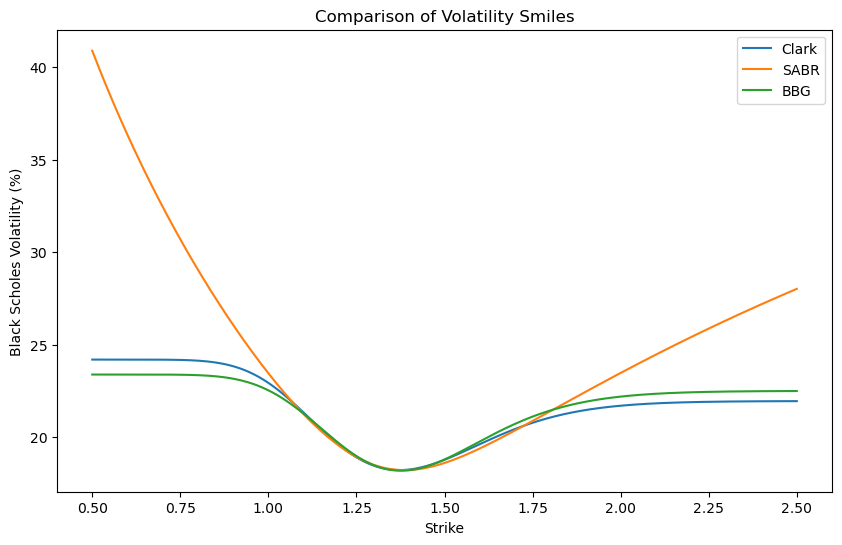

In [18]:
plt.figure(figsize=(10,6))
plt.plot(strikes, volsClark, label="Clark")
plt.plot(strikes, volsSABR, label="SABR")
plt.plot(strikes, volsBBG, label="BBG")
plt.xlabel("Strike")
plt.ylabel("Black Scholes Volatility (%)")
plt.title("Comparison of Volatility Smiles")
plt.legend();

## Implied FX Rate Probability Density Functions

In [19]:
lower = 0.50
upper = 2.25
dbnClark = fxVolSurfaceClark.implied_dbns(lower, upper, 1000)
dbnSABR = fxVolSurfaceSABR.implied_dbns(lower, upper, 1000)
dbnBBG = fxVolSurfaceBBG.implied_dbns(lower, upper, 1000)

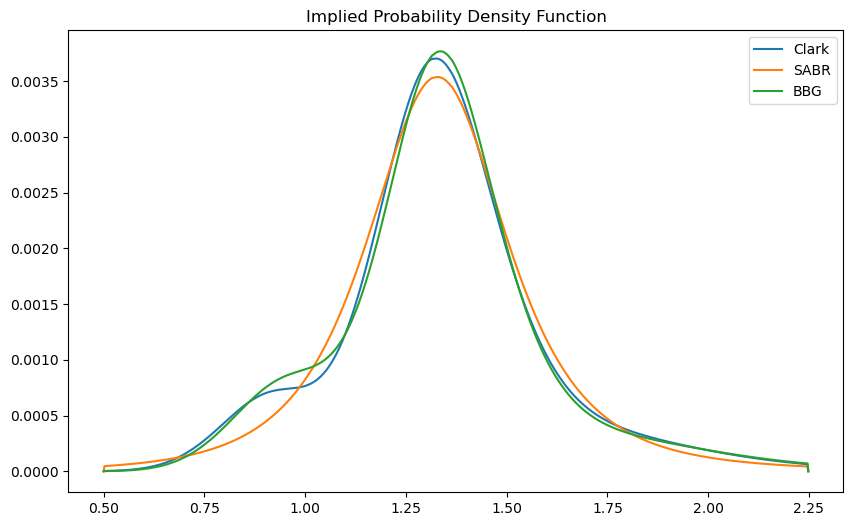

In [20]:
plt.figure(figsize=(10,6))
plt.plot(dbnClark[0]._x, dbnClark[0]._densitydx, label="Clark")
plt.plot(dbnSABR[0]._x, dbnSABR[0]._densitydx, label="SABR")
plt.plot(dbnBBG[0]._x, dbnBBG[0]._densitydx, label="BBG")
plt.title("Implied Probability Density Function")
plt.legend();

## Expiry Date Interpolation

We only have one expiry date. The volatility is therefore assumed to be flat at the level of this expiry date.

In [21]:
k = 1.30

In [22]:
years = np.linspace(0.0, 2.0, 100)

In [23]:
expiry_dts = value_dt.add_years(years)

In [ ]:
volsClark = []
volsSABR = []
volsBBG = []

for expiry_dt in expiry_dts:

    volClark = fxVolSurfaceClark.vol_from_strike_dt(k, expiry_dt)
    volSABR = fxVolSurfaceSABR.vol_from_strike_dt(k, expiry_dt)
    volBBG = fxVolSurfaceBBG.vol_from_strike_dt(k, expiry_dt)

    volsClark.append(volClark*100.0)
    volsSABR.append(volSABR*100.0)
    volsBBG.append(volBBG*100.0)

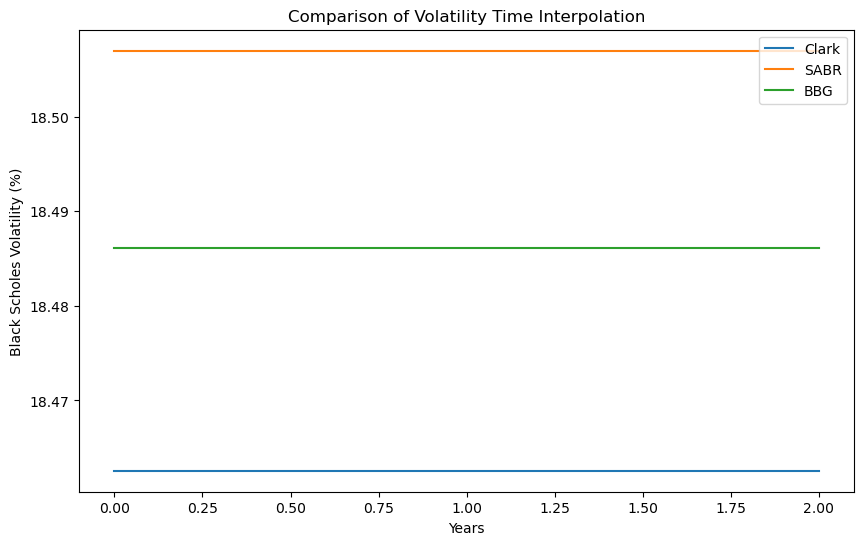

In [25]:
plt.figure(figsize=(10,6))
plt.plot(years, volsClark, label="Clark")
plt.plot(years, volsSABR, label="SABR")
plt.plot(years, volsBBG, label="BBG")
plt.xlabel("Years")
plt.ylabel("Black Scholes Volatility (%)")
plt.title("Comparison of Volatility Time Interpolation")
plt.legend();

Copyright (c) 2020, Dominic O'Kane 